### Customer Segmentation Using K-Means Clustering on Spending Patterns in an Indian Retail Dataset

##### Objective:To perform customer segmentation using K-Means clustering based on spending patterns in the Indian retail dataset.

##### Prerequisites:

Basic knowledge of Python

Understanding of clustering techniques, particularly K-Means

Familiarity with Pandas, NumPy, Matplotlib, Seaborn, and Scikit-Learn libraries

##### Dataset Description:
The dataset contains retail sales and customer demographic details. The key features include:

Transaction ID – Unique identifier for transactions.

Date – Date of the transaction.

Customer ID – Unique identifier for customers.

Gender – Gender of the customer (Male/Female).

Age – Age of the customer.

Product Category – Category of the purchased product.

Quantity – Number of units purchased.

Price per Unit – Cost per unit of the product.

Total Amount – Total amount spent in the transaction.

##### Lab Steps:

#### Step 1: Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Explore the Dataset

In [2]:
# Download dataset from : https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset

# Load the dataset
df = pd.read_csv("retail_sales_dataset.csv")

# Display the first 10 rows to get an initial overview of the data
print("First 10 rows of the dataset:\n", df.head(10), "\n\n")

# Display information about data types and missing values
print("Dataset Info:\n")
df.info()  # This shows the structure of the DataFrame

# Display summary statistics for numerical columns
print("\nSummary Statistics:\n", df.describe())

First 10 rows of the dataset:
    Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   
5               6  2023-04-25     CUST006  Female   45           Beauty   
6               7  2023-03-13     CUST007    Male   46         Clothing   
7               8  2023-02-22     CUST008    Male   30      Electronics   
8               9  2023-12-13     CUST009    Male   63      Electronics   
9              10  2023-10-07     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1

#### Step 3: Data Preprocessing

Handle missing values if any.

Select relevant features for clustering.

Normalize numerical values for better clustering.

In [3]:
# check the missing values
print(df.isnull().sum())

# selecting the relevant features for clustering
print(df.columns)
features = ['Age','Quantity', 'Price per Unit', 'Total Amount']

# below step is used to avoid confusion with the following
# df[['Age','Quantity', 'Price per Unit', 'Total Amount']]
x = df[features]

# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler[:5]

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


array([[-0.54056476,  0.42926498, -0.68512265, -0.5467043 ],
       [-1.12559156, -0.45399629,  1.68846418,  0.97191876],
       [ 0.62948884, -1.33725757, -0.7906154 , -0.76109815],
       [-0.32117971, -1.33725757,  1.68846418,  0.07861108],
       [-0.83307816, -0.45399629, -0.68512265, -0.63603507]])

#### Step 4: Determine Optimal Number of Clusters (Elbow Method)

In [4]:
# Within-cluster sum of squares
from sklearn.cluster import KMeans


In [5]:
import os
import warnings
from sklearn.cluster import KMeans

# Environment variables
os.environ["LOKY_MAX_CPU_COUNT"] = "4"
os.environ["OMP_NUM_THREADS"] = "4"

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Parallel backend fix
import joblib
joblib.parallel_backend('threading')

# KMeans clustering
wcss = []
for i in range(2, 11):
    k = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k.fit(x_scaler)  # Ensure x_scaler is properly preprocessed
    wcss.append(k.inertia_)

print(wcss)

[2413.7255623331757, 1919.335508488933, 1471.7800268965707, 1363.2210426652007, 1051.115873940248, 929.6545052649504, 849.1440531776675, 836.7598485823008, 657.0692536445782]


In [6]:
wcss 
# Within Clusters sum squares : measures how tightly the data points clustered around centriods 

[2413.7255623331757,
 1919.335508488933,
 1471.7800268965707,
 1363.2210426652007,
 1051.115873940248,
 929.6545052649504,
 849.1440531776675,
 836.7598485823008,
 657.0692536445782]

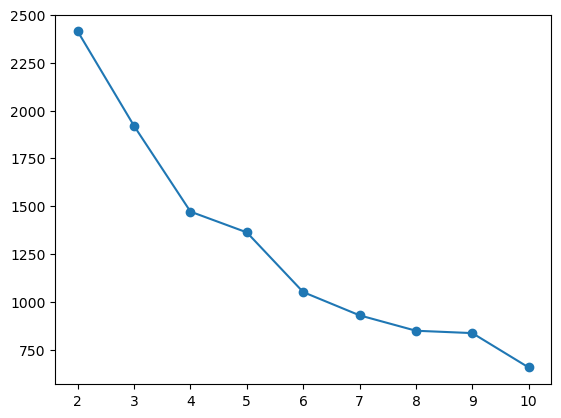

In [7]:
# Plot Elbow method
plt.plot(range(2,11),wcss,marker='o')

#### Step 5: Apply K-Means Clustering

In [8]:
# Applying K-Means with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3,init="k-means++",random_state=42)
df['Cluster']=kmeans.fit_predict(x_scaler)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Cluster
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,1
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0


#### Step 6: Visualizing Clusters using PCA

In [9]:
# Scatter plot of clusters
from sklearn.decomposition import PCA

In [10]:
pca=PCA(n_components=2)
x_pca = pca.fit_transform(x_scaler)
x_pca[:5]

array([[-0.65708352, -0.84409973],
       [ 1.72575328, -0.33956636],
       [-1.48454179,  0.87659746],
       [ 0.77626109,  0.68859974],
       [-0.95519422, -0.73832597]])

In [11]:
x_pca[:,0][:5]

array([-0.65708352,  1.72575328, -1.48454179,  0.77626109, -0.95519422])

In [12]:
df['PCA1']=x_pca[:,0]
df['PCA2']=x_pca[:,1]

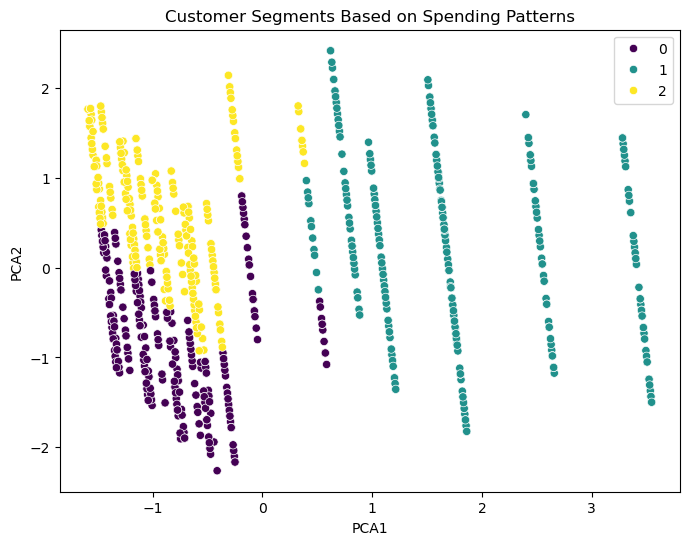

In [14]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette='viridis')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Customer Segments Based on Spending Patterns")
plt.legend()
plt.show()

#### Step 7: Interpretation and Conclusion

Analyze customer clusters and their spending behaviors.

Suggest marketing strategies tailored to each customer segment.

Discuss limitations and potential improvements using hierarchical clustering or DBSCAN.

##### End of the Lab Activity